## Imports

In [1]:
import csv
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import seaborn as sn
import pandas as pd
from sklearn.model_selection import learning_curve
from sklearn.metrics import *
from general_analysis import *
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
import time
from explore_hyperparameter import *
from plot_learning_curve import *
from sklearn.utils.class_weight import compute_class_weight



import warnings
warnings.filterwarnings('ignore')


RANDOM_STATE = 5000 #to keep results consistent


## Load Data

In [2]:
data = []
f = open('spambase.data')
readcsv = csv.reader(f)
classes = next(readcsv, None)
for row in readcsv:
    data.append(row)
f.close()

word_labels = ['address', 'all', '3d', 'our', 'over', 'remove', 'internet',
               'order', 'mail', 'receive', 'will', 'people', 'report', 'addresses',
               'free', 'business', 'email', 'you', 'credit', 'your', 'font', '000',
               'money', 'hp', 'hpl', 'george', '650', 'lab', 'labs', 'telnet', '857',
               'data', '415', '85', 'technology', '1999', 'parts', 'pm', 'direct',
               'cs', 'meeting', 'original', 'project', 're', 'edu', 'table', 'conference']



### Separate X and y

In [3]:

X = np.array([x[:-1] for x in data]).astype(np.float)
y = np.array([x[-1] for x in data]).astype(np.float)
X = preprocessing.scale(X)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = RANDOM_STATE)
X_train = X_train[:, 0:57]
X_test = X_test[:, 0:57]
y_test = y_test.astype(int)
y_train = y_train.astype(int)
y_test = np.array(y_test)


## Looping through hyperparameters

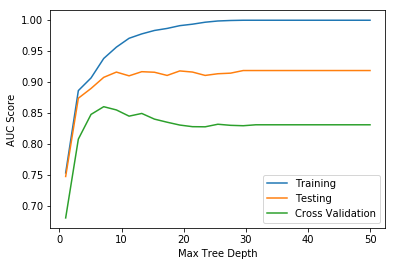

In [4]:
param = np.linspace(1, 50, 25, endpoint=True)
clf = [DecisionTreeClassifier(max_depth=int(i), random_state=RANDOM_STATE) for i in param]
explore_hyperparameter(X, y, X_train, y_train, X_test, y_test, clf, param, 'Max Tree Depth')

## min_samples_leaf


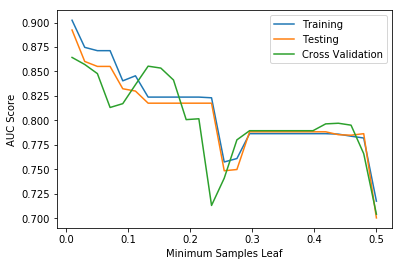

In [5]:
param = np.linspace(0.01, 0.5, 25, endpoint=True)
clf = [DecisionTreeClassifier(min_samples_leaf=i, random_state=RANDOM_STATE) for i in param]
explore_hyperparameter(X, y, X_train, y_train, X_test, y_test, clf, param, 'Minimum Samples Leaf')

## min_samples_split

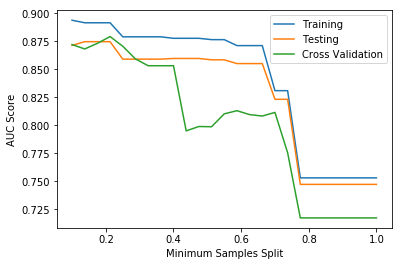

In [6]:
param = np.linspace(0.1, 1.0, 25, endpoint=True)
clf = [DecisionTreeClassifier(min_samples_split=i, random_state=RANDOM_STATE) for i in param]
explore_hyperparameter(X, y, X_train, y_train, X_test, y_test, clf, param, 'Minimum Samples Split')

## Learning Curve

5.3020031452178955


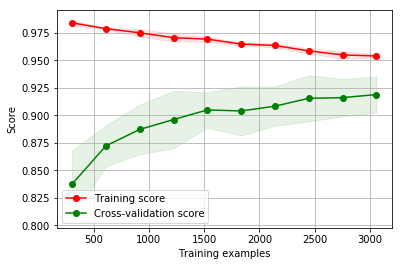

In [7]:
start = time.time()
clf = DecisionTreeClassifier(random_state=RANDOM_STATE, max_depth=8)
clf.fit(X_train, y_train)
plot_learning_curve(clf, X_train, y_train, cv=20, train_sizes = np.linspace(0.1, 1, 10))
end = time.time() - start
print(end)

## Trying to explain the gap in cross validation and test results

Maybe it is because the dataset is imbalanced, meaning there is a lot less spam than non-spam. 

In [8]:
print(compute_class_weight('balanced', np.unique(y_test), y_test))

[0.8313253  1.25454545]


In [9]:
count = 0
for i in y_test:
    if i == 1:
        count += 1
print(count/len(y_test))



0.39855072463768115


It seems like there is about 40% spam in the dataset, which is not very imbalanced at all. I'm not sure what the cause of this gap is then. I used the same code on the letter recognition and cross validation lined up very well with test results.

### UPDATE: CHANGING K IN KFOLD DID WONDERS! MAYBE IT'S BECAUSE THIS DATASET NEEDED MORE TRAINING DATA (BECAUSE ITS NOT AS BIG) (this dataset has 4600 instances, the other had 20000)